# **AI Workshop: From Agents to Intelligent Search**

## - Led by Ayaan Ahmad

### A hands-on guide on building and programming intelligent agents to solve complex problems.

# AI Workshop - Lab 6: The DFS Challenge (Bonus)

Can a "dumb" algorithm ever beat a "smart" one?

In this challenge, we'll run all three algorithms on a specially designed maze. 
This maze has a long, winding optimal path from the bottom-right start (45,45) 
to the top-left goal (1,1), which heavily favors the West/North priority of our DFS implementation.

Let's see what happens...

## Install Libraries

In [ ]:
pip install Pillow

### Importing Libraries

In [1]:
# 1. Import Libraries
from pyamaze import maze, agent, COLOR, textLabel
import os
import glob
from PIL import Image
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from queue import PriorityQueue

# Part 5: Understanding the problem

Today, we've seen how different algorithms can solve the same problem with vastly different strategies and efficiencies.

DFS is simple but often finds suboptimal paths.

BFS finds the shortest path but can waste time exploring in every direction.

A* provides the best of both worlds: it finds the optimal path efficiently by using an intelligent heuristic.

Objective: To demonstrate a scenario where the "dumbest" algorithm wins, proving that the structure of the data is as important as the algorithm itself.

In [2]:
# (We include the function definitions here so this notebook can run independently)
def DFS(m):
    start = (m.rows, m.cols)
    explored, frontier, dfsPath = [start], [start], {}
    searchPath = []
    while frontier:
        currCell = frontier.pop()
        searchPath.append(currCell)
        if currCell == (1, 1): break
        for d in "ESNW": # This results in a W -> N -> S -> E priority
            if m.maze_map[currCell][d]:
                if d == 'E': childCell = (currCell[0], currCell[1] + 1)
                elif d == 'W': childCell = (currCell[0], currCell[1] - 1)
                elif d == 'N': childCell = (currCell[0] - 1, currCell[1])
                elif d == 'S': childCell = (currCell[0] + 1, currCell[1])
                if childCell in explored: continue
                explored.append(childCell)
                frontier.append(childCell)
                dfsPath[childCell] = currCell
    fwdPath = {}
    cell = (1, 1)
    while cell != start: fwdPath[dfsPath[cell]] = cell; cell = dfsPath[cell]
    return fwdPath, searchPath

def BFS(m):
    start = (m.rows, m.cols)
    explored = [start]
    frontier = [start]
    bfsPath = {}

    while len(frontier) > 0:
        currCell = frontier.pop(0)
        # Goal check removed to allow for full exploration
        if currCell == (1, 1):
            break
        for d in "ESNW":
            if m.maze_map[currCell][d]:
                if d == 'E': childCell = (currCell[0], currCell[1] + 1)
                elif d == 'W': childCell = (currCell[0], currCell[1] - 1)
                elif d == 'N': childCell = (currCell[0] - 1, currCell[1])
                elif d == 'S': childCell = (currCell[0] + 1, currCell[1])
                if childCell in explored: continue
                explored.append(childCell)
                frontier.append(childCell)
                bfsPath[childCell] = currCell
    fwdPath = {}
    cell = (1, 1)
    if cell in bfsPath or cell == start:
        while cell != start:
            fwdPath[bfsPath[cell]] = cell
            cell = bfsPath[cell]
    return fwdPath, explored

def h(cell1, cell2):
    x1, y1 = cell1; x2, y2 = cell2
    return abs(x1 - x2) + abs(y1 - y2)

def aStar(m):
    start = (m.rows, m.cols)
    g_score = {cell: float('inf') for cell in m.grid}; g_score[start] = 0
    f_score = {cell: float('inf') for cell in m.grid}; f_score[start] = h(start, (1, 1))
    pq = PriorityQueue(); pq.put((f_score[start], h(start, (1, 1)), start))
    aPath, searchPath = {}, []
    while not pq.empty():
        currCell = pq.get()[2]
        searchPath.append(currCell)
        if currCell == (1, 1): break
        for d in "ESNW":
            if m.maze_map[currCell][d]:
                if d == 'E': childCell = (currCell[0], currCell[1] + 1)
                elif d == 'W': childCell = (currCell[0], currCell[1] - 1)
                elif d == 'S': childCell = (currCell[0] + 1, currCell[1])
                elif d == 'N': childCell = (currCell[0] - 1, currCell[1])
                temp_g_score = g_score[currCell] + 1
                temp_f_score = temp_g_score + h(childCell, (1, 1))
                if temp_f_score < f_score[childCell]:
                    g_score[childCell], f_score[childCell] = temp_g_score, temp_f_score
                    pq.put((temp_f_score, h(childCell, (1, 1)), childCell))
                    aPath[childCell] = currCell
    fwdPath = {}
    cell = (1, 1)
    while cell != start: fwdPath[aPath[cell]] = cell; cell = aPath[cell]
    return fwdPath, searchPath

DFS on challenge maze: Time=0.0010s, Explored=119, Path=94
BFS on challenge maze: Time=0.0177s, Explored=554, Path=72
A* on challenge maze: Time=0.0041s, Explored=318, Path=72

--- Challenge Performance Data ---


,Algorithm,Time (s),Explored Cells,Path Length
0,DFS,0.001000,119,94
1,BFS,0.017750,554,72
2,A*,0.004129,318,72


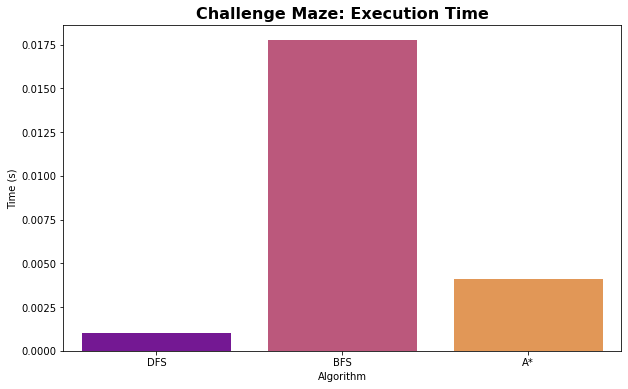

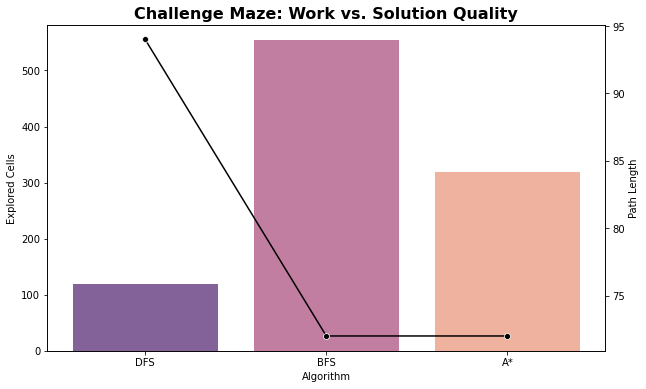

In [3]:
# --- Run all algorithms on the challenge maze ---
challenge_maze_file = 'workshop_maze.csv'
challenge_results = []
algorithms = {'DFS': DFS, 'BFS': BFS, 'A*': aStar}
for name, func in algorithms.items():
    m = maze(); m.CreateMaze(loadMaze=challenge_maze_file)
    start_time = time.time()
    final_path, explored_cells = func(m)
    end_time = time.time()
    
    time_taken = end_time - start_time
    explored_count = len(explored_cells)
    path_length = len(final_path)
    
    challenge_results.append({'Algorithm': name, 'Time (s)': time_taken, 'Explored Cells': explored_count, 'Path Length': path_length})
    print(f"{name} on challenge maze: Time={time_taken:.4f}s, Explored={explored_count}, Path={path_length}")

# --- Step 3: The Final Showdown ---
df_challenge = pd.DataFrame(challenge_results)
results_file = 'challenge_results.csv'
df_challenge.to_csv(results_file, index=False)

print(f"\n--- Challenge Performance Data ---")
display(df_challenge)

# --- Graph 1: Execution Time ---
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Algorithm', y='Time (s)', data=df_challenge, palette='plasma')
ax.set_title('Challenge Maze: Execution Time', fontsize=16, fontweight='bold')
plt.show()

# --- Graph 2: Work vs. Solution Quality ---
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(x='Algorithm', y='Explored Cells', data=df_challenge, ax=ax1, palette='magma', alpha=0.7)
ax1.set_title('Challenge Maze: Work vs. Solution Quality', fontsize=16, fontweight='bold')
ax2 = ax1.twinx()
sns.lineplot(x='Algorithm', y='Path Length', data=df_challenge, ax=ax2, color='black', marker='o', sort=False)
plt.show()

## Conclusion

The goal of this experiment was to showcase that there's no necessary good or bad algorithm, but it is the factor of understanding the problem to find the most optimal way to fit the algorithm in a way that fits our needs.